# Lab 5: Scientific Computing Fundamentals in Python
___

## 1. Implement your own Cholesky-decomposition (Linear algebra)

Say we have a matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ with the factorization form $\mathbf{A = BB^T}$ where $\mathbf{B}$ is nonsingular. In this fashion, $\mathbf{A}$ is symmetric and positive definite (SPD). That is,
$$
\begin{align}
\mathbf{A = A^T}\\
\mathbf{x^T A x} > 0, \forall \mathbf{x} \neq 0 \in \mathbb{R}^n
\end{align}
$$

As a symmetric and positive definite matrix, the matrix $\mathbf{A}$ has the special form of $\mathbf{LU}$-decomposition:
$$
\mathbf{A = LL^T}
$$
where $\mathbf{L}$ is lower triangular and of positive diagonal elements. Here is an example in $\mathbb{R}^3$:
$$
\mathbf{A} = \left[
\begin{array}{ccc}
a_{11} & a_{21} & a_{31}\\
a_{21} & a_{22} & a_{32}\\
a_{31} & a_{32} & a_{33}
\end{array}
\right], \mathbf{L} = \left[
\begin{array}{ccc}
l_{11} & 0 & 0\\
l_{21} & l_{22} & 0\\
l_{31} & l_{32} & l_{33}
\end{array}
\right]
$$

- Compute the entries in $\mathbf{LL^T}$ symbolically:
$$
\mathbf{LL^T} = \left[
\begin{array}{ccc}
l_{11}^2 & - & -\\
- & - & -\\
- & - & -
\end{array}
\right]
$$
- Equate the product with $\mathbf{A}$:
$$
\begin{align}
a_{11} = l_{11}^2\\
a_{21} = -\\
a_{22} = -\\
a_{31} = -\\
a_{32} = -\\
a_{33} = -\\
\end{align}
$$
- Compute $l_{ij}$ one by one in an order:
$$
\begin{align}
l_{11} = \sqrt{a_{11}}\\
l_{21} = -\\
l_{22} = -\\
l_{31} = -\\
l_{32} = -\\
l_{33} = -
\end{align}
$$

- Can you generalize the above equations to $\mathbb{R}^{n \times n}$ cases? 将$3 \times 3$的例子推广到$n \times n$
$$
\begin{array}{lcl}
l_{11} &=& \sqrt{a_{11}}\\
l_{21} &=& a_{21} / l_{11}\\
l_{22} &=& \sqrt{a_{22} - l_{21}^2}\\
\vdots & = & \vdots\\
l_{ij} &=& - \\
l_{ii} &=& -\\
\vdots & = & \vdots
\end{array}
$$

- Implement the above generalization in Python and run it on 3 random SPD matrices of size $5 \times 5$, $10 \times 10$ and $20 \times 20$, respectively. Here is some example scripts to generate a random SPD matrix of size $n \times n$:

In [1]:
import numpy as np
def rand_spd(n):
    B = np.random.rand(n, n)
    return np.dot(B, B.T)

[[ 0.07296473  0.25882103  0.14999367]
 [ 0.25882103  1.21249605  0.78527317]
 [ 0.14999367  0.78527317  0.52732145]]


In [40]:
def mycholesky(A):
    pass

In [74]:
A = rand_spd(20)
chol1 = mycholesky(A)

- Compute the relative error $\lVert \mathbf{LL^T - A} \rVert_2 / \lVert \mathbf{A} \rVert_2$, where the $L_2$-norm can be computed using `numpy.linalg.norm()`.

In [76]:
np.linalg.norm(np.dot(chol1, chol1.T)-A, 2)/np.linalg.norm(A, 2)

2.056111001573917e-17

- For a triangular matrix, the determinant is the product of its diagonal entries. Moreover, $\textrm{det}(AB) = \textrm{det}(A)\textrm{det}(B)$. Therefore, you can compute the determinants of the above SPD matrices and then compare to the results obtained using the function `numpy.linalg.det()`.

In [77]:
np.diag(chol1).prod()**2

8.9952276812619192e-09

## 2. Implement principal component analysis (PCA)

Principal component analysis is a statistical procedure that can be used to find the 'main axes' of a data set. Here, data set refers to a set of points in $n$-dimensional space, where the idea is that most of the data lies 'around' these main axes. In the language of statistics, this helps identify variables that vary together, or, literally, are correlated. It also provides so-called 'principal components', which are orthogonal to one another
and uncorrelated.

For a data set $(\mathbf{x}_i)_{i=1}^N \subset \mathbb{R}^n$, PCA can be performed as follows:

#### (1). Compute the empirical mean:
$$
\mathbf{u} := \frac{1}{N}\sum_{i=1}^N \mathbf{x}_i
$$

#### (2). Subtract the mean:
$$
\tilde{\mathbf{x}}_i := \mathbf{x}_i - \mathbf{u}
$$

#### (3). Stack the matrix:
$$
\mathbf{Y} := \frac{1}{\sqrt{N-1}}\left[  
\begin{array}{ccc}
\tilde{\mathbf{x}}_1 & \cdots & \tilde{\mathbf{x}}_N
\end{array}
\right]
$$

#### (4). Compute the SVD (using `numpy.linalg.svd()`) of $\mathbf{Y}$:
$$
\mathbf{Y} = \mathbf{U \Sigma V^T}
$$

Now the principal components can be computed as the columns of $\mathbf{U\Sigma}$. 

- (1) Use Python to implement the above algorithm to compute the principal components.

In [390]:
def mypca(X):
    pass

- (2) Plot the 2D data set generated using the following function:

In [391]:
def make_data(dims=2, npts=3000):
    np.random.seed(123)
    mix_mat = np.random.randn(dims, dims)
    mean = np.random.randn(dims)
    return np.dot(
        mix_mat,
        np.random.randn(dims, npts)) + mean[:, np.newaxis]

In [400]:
import matplotlib.pyplot as plt
%matplotlib inline

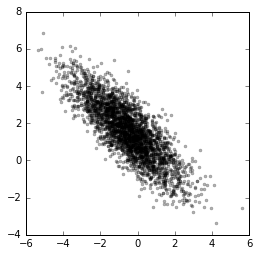

In [401]:
fig = plt.figure()
ax = plt.gca()
ax.set_aspect('equal')
ax.plot(X[0,:], X[1,:], 'k.', alpha=0.30)

- (3) Compute the principal components of this same data set and draw them into the same plot as the result from above, centered at the mean.
    + Use `matplotlib.pyplot.gca().set_aspect("equal")` to make sure Matplotlib does not distort angles in your figure.
    + Use `matplotlib.pyplot.arrow()` to draw arrows into the figure. Draw one for each principal component starting from the mean point.

- (4) From $U$, $\Sigma$, and $V^T$ as returned by `numpy`, reconstruct the matrix $\tilde{Y}$ :
$$
\tilde{Y} = U \Sigma V^T
$$
Print the relative error \Vert \tilde{Y} − Y \Vert_2/\Vert Y \Vert_2. (This should come out to about machine precision.)

- (5) Now set the bottom right nonzero entry of $\Sigma$ to zero. Call the result $\Sigma_0$ and reconstruct another matrix $Y_0$:
$$
Y_0 = U \Sigma_0 V^T
$$
Next, undo the transformations done to $Y_0$ to get back to plain data (undo scaling by $1/\sqrt{N − 1}$, re-add mean) and make a new plot with the principal components and the data set obtained from $Y_0$.

In fact, we can project the original data into the new coordinate system, which will result in a rotation.

In [407]:
y = np.dot(X.T, pc)

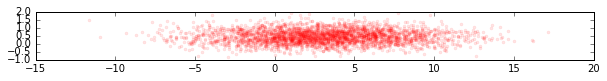

In [408]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
ax.plot(y[:,0], y[:,1], 'r.', alpha=0.1)

## 3. DNA Binding Site Analysis

### 3.1 Loading data

Our analysis procedure will be operated on a text file containing the nucleotide counts of the E. Coli DNA binding sites of the transcription factor CRP (cAMP receptor protein, a.k.a CAP, catabolite gene activator protein). You can find it at [crp_counts.dat](crp_counts.dat).

In [409]:
!cat crp_counts.dat

109	61	57	115
95	74	62	111
111	70	70	91
89	68	83	102
99	79	72	92
93	66	72	111
83	79	77	103
91	85	70	96
121	63	71	87
143	38	57	104
162	25	38	117
155	28	43	116
127	43	46	126
40	40	29	233
32	16	240	54
30	36	27	249
29	18	254	41
227	41	46	28
74	54	53	161
68	106	77	91
70	81	55	136
131	45	88	78
77	74	100	91
134	60	59	89
32	31	30	249
46	247	14	35
238	29	41	34
60	232	16	34
217	35	45	45
94	62	49	137
116	39	20	167
113	43	24	162
89	51	38	164
100	62	58	122
110	72	67	93
105	62	76	99
108	90	65	79
110	71	72	89
93	76	65	108
102	74	66	100
121	72	44	105
130	49	52	111


We need to convert it to a numerical array in order to perform computations using the [genfromtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) function:

In [410]:
# loads data from text file and store in an integer NumPy array called 'counts'
filename = 'crp_counts.dat'
counts=np.genfromtxt(filename,dtype=int)

### 3.2 Working with numerical arrays

In [411]:
counts.ndim # what is the dimensionality of the array?

2

In [412]:
counts.shape # what is the size of the array? (rows, columns)

(42, 4)

In [413]:
counts.dtype # what is the data type of the array?

dtype('int64')

#### Array indexing

Let's practise some array indexing to remember how they work in Python

In [414]:
# let's have a look at the first five rows
counts[0:5]

array([[109,  61,  57, 115],
       [ 95,  74,  62, 111],
       [111,  70,  70,  91],
       [ 89,  68,  83, 102],
       [ 99,  79,  72,  92]])

In [415]:
# the last two rows
counts[-2:]

array([[121,  72,  44, 105],
       [130,  49,  52, 111]])

In [416]:
# every third row beginning with the first
counts[::3]

array([[109,  61,  57, 115],
       [ 89,  68,  83, 102],
       [ 83,  79,  77, 103],
       [143,  38,  57, 104],
       [127,  43,  46, 126],
       [ 30,  36,  27, 249],
       [ 74,  54,  53, 161],
       [131,  45,  88,  78],
       [ 32,  31,  30, 249],
       [ 60, 232,  16,  34],
       [116,  39,  20, 167],
       [100,  62,  58, 122],
       [108,  90,  65,  79],
       [102,  74,  66, 100]])

In [417]:
# assess whether the previous elements are greater than 70
counts[2:4,1:4]>70

array([[False, False,  True],
       [False,  True,  True]], dtype=bool)

#### Computations on arrays

In [418]:
# the minimum and maximum element of the array
np.min(counts), np.max(counts)

(14, 254)

In [419]:
# select the elements greater than 200
counts[counts>200]

array([233, 240, 249, 254, 227, 249, 247, 238, 232, 217])

In [420]:
# what are the indices of the elements greater than 200? 
# The Numpy function "where" returns the indices in separate arrays of rows and columns.
np.where(counts>200)

(array([13, 14, 15, 16, 17, 24, 25, 26, 27, 28]),
 array([3, 2, 3, 2, 0, 3, 1, 0, 1, 0]))

In [421]:
# select elements that are greater than 200 and also divisible by 3, i.e. counts mod 3 = 0
counts[(counts>200) & (counts%3==0)]

array([240, 249, 249])

#### Dot Product

Frequently when performing operations on arrays we have to take the dot product of two list of numbers, or two vectors, e.g. $\vec{x}=\{x_1,x_2,x_3\}$ and $\vec{y}=\{y_1,y_2,y_3\}$. The dot product $\vec{x} \cdot \vec{y}$ is defined as
$$
x \cdot y = \sum_{i=1}^{3} x_i y_i
$$
NumPy provides an efficient way of doing this without explicitly writing a 'for loop'

In [422]:
# dot product between rows 3 and 8
np.dot(counts[2],counts[7])

29687

In [423]:
# sum each column of the array, i.e. sum along the rows, the dimension indexed as 0
np.sum(counts,axis=0) 

array([4374, 2747, 2688, 4555])

In [424]:
# sum each row of the array, i.e. sum along the columns, the dimension indexed as 1
np.sum(counts, axis=1) 

array([342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342])

In [425]:
# mean, median and standard deviation of each column
np.mean(counts,0), np.median(counts,0), np.std(counts,0) 

(array([ 104.14285714,   65.4047619 ,   64.        ,  108.45238095]),
 array([ 101. ,   62. ,   57.5,  102.5]),
 array([ 47.21106177,  43.99245581,  45.42759807,  50.88933015]))

We can add pseudocounts to each element. This is usually a good idea if your count data is undersampled.

Let's calculate the probabilities of each nucleotide at each position, e.g. the probability of seeing an A at position i is
$$
\begin{array}
pp_i(A)&=&\frac{\rm{counts}_i(A)}{\rm{counts}_i(A)+\rm{counts}_i(T)+\rm{counts}_i(G)+\rm{counts}_i(C)} \\
&=&\frac{\rm{counts}_i(A)}{\rm{total\_counts}_i}
\end{array}
$$
The total counts is the same for all positions, so we might just as well use only the first position to evaluate it.

In [427]:
# add 1 to EVERY element of the counts matrix to form a new matrix 'new_counts'
new_counts=counts+1

In [428]:
total_counts=sum(new_counts[0])
prob=new_counts/total_counts
print prob

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


what happened?

In [429]:
from __future__ import division
total_counts=sum(new_counts[0])
prob=new_counts/total_counts
print prob

[[ 0.31791908  0.17919075  0.16763006  0.33526012]
 [ 0.27745665  0.21676301  0.18208092  0.32369942]
 [ 0.32369942  0.20520231  0.20520231  0.26589595]
 [ 0.26011561  0.19942197  0.24277457  0.29768786]
 [ 0.28901734  0.23121387  0.21098266  0.26878613]
 [ 0.2716763   0.19364162  0.21098266  0.32369942]
 [ 0.24277457  0.23121387  0.22543353  0.30057803]
 [ 0.26589595  0.24855491  0.20520231  0.28034682]
 [ 0.35260116  0.1849711   0.20809249  0.25433526]
 [ 0.41618497  0.11271676  0.16763006  0.30346821]
 [ 0.47109827  0.07514451  0.11271676  0.34104046]
 [ 0.45086705  0.08381503  0.12716763  0.33815029]
 [ 0.3699422   0.12716763  0.13583815  0.36705202]
 [ 0.11849711  0.11849711  0.0867052   0.67630058]
 [ 0.09537572  0.04913295  0.69653179  0.15895954]
 [ 0.08959538  0.10693642  0.08092486  0.72254335]
 [ 0.0867052   0.05491329  0.73699422  0.12138728]
 [ 0.65895954  0.12138728  0.13583815  0.08381503]
 [ 0.21676301  0.15895954  0.15606936  0.46820809]
 [ 0.19942197  0.30924855  0.22

It's often a good idea to represent the data graphically to glean what's going on

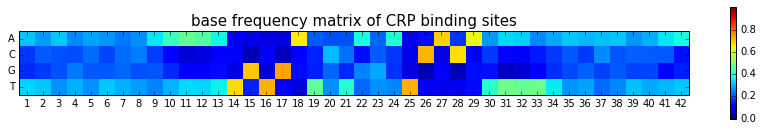

In [431]:
# set the size of the figure
plt.figure(figsize=[15,2])

# show the array flipped (transposed) and with no colour interpolation smoothing
plt.imshow(prob.T,interpolation='nearest')

# set the ticks
plt.xticks(range(0,42),range(1,43))
plt.yticks(range(4),['A','C','G','T'])

# set the colorbar
plt.clim([0,1])
plt.colorbar(ticks=np.arange(0,1,0.2))

# title
plt.title('base frequency matrix of CRP binding sites',fontsize=15)

### $\S$Exercise: Entropy function and Sequence Conservation

We want to know how conserved the individual positions are. We start by calculating the entropy. The entropy H of nucleotide variability at each site i is defined by, 
$$
H_i=-\sum_{n=\{A,C,T,G\}} p_i(n) \log_2 p_i(n)
$$
From the formula, we see that this calculation involves a dot product between the rows of the probability array and the rows of a log probability array. We have to be remember that $0 \log_2 0 = 0$, if any of the probabilities are zero. This is important since $\log_20=-\infty$ and computers don't like dealing with infinities. A simple way to deal with this is to remove all the zero probabilities in the above entropy summation formula.

Let's define a function to compute the entropy:

In [432]:
# defining a new function 'entropy_calc' which takes as input a 1D array p
def entropy_calc(p):
    p=p[p!=0]
    result=np.dot(np.log2(1/p),p)
    return result

Now we can evaluate the entropy at each nucleotide position:

In [433]:
# loop through every row of the 'prob' array and evaluate the entropy 
DNA_entropy=np.array([entropy_calc(row) for row in prob])
print DNA_entropy

[ 1.93058651  1.96552364  1.97261799  1.98543983  1.98914028  1.96977195
  1.99007327  1.99055291  1.95423939  1.83532602  1.67642971  1.72522979
  1.83103394  1.41673422  1.32210514  1.28901589  1.22955655  1.45681499
  1.8307097   1.98013624  1.91557164  1.90779924  1.98933969  1.91490193
  1.29159019  1.27154435  1.37822325  1.37352383  1.53361903  1.89163949
  1.64024155  1.69155439  1.78068749  1.93158424  1.9718647   1.97030341
  1.97617255  1.9764238   1.9741195   1.97573143  1.90948341  1.87516361]


We see that most entropy values are fairly close to the maximum of two bits, representing a great deal of base variability. Let's plot the results.

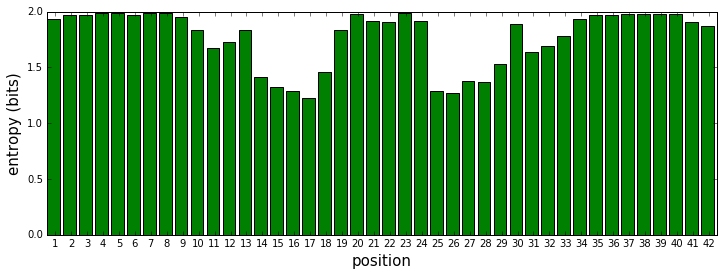

In [435]:
# number of nucleotide positions
num_pos=len(DNA_entropy)

# set the size of the figure
plt.figure(figsize=(12,4))

# plot a bar chart
plt.bar(np.arange(num_pos),DNA_entropy,color='green')

# axes labels
plt.xlabel('position',fontsize=15)
plt.ylabel('entropy (bits)',fontsize=15)

# limit the x axis range to just to the total number of nucleotide positions
plt.xlim(0,num_pos)

# place the x axis ticks and labels to be centered at each bar
plt.xticks(np.arange(num_pos)+0.5,np.arange(1,num_pos+1),fontsize=10);

What we really want to calculate is the sequence conservation, R. This is defined to be the total possible entropy at each site minus the observed entropy:
$$
\begin{array}
RR &=& H_{max}-H_{obs} \\
&=& \log_2(\rm{no. of  states})-\left( - \sum_{n=\{A,C,T,G\}} p(n) \log_2 p(n) \right) \\
&=& 2 + \sum_{n=\{A,C,T,G\}} p(n) \log_2 p(n)
\end{array}
$$